# Multiple Linear Regression

# Problem Statement - Fual Consumption

1. Ability to model and predict the fuel assumption

1. Data collection / Data Gathering
2. Data Processing
3. Feature Engineering
4. Model Selection:
    1. Indepedent 
    2. Dependent
5. Evalution
6. Deployement

**1. Import Library (Required Library)**

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Read DataSet

In [2]:
df = pd.read_csv('FuelConsumption.csv')

In [3]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.tail()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260
1066,2014,VOLVO,XC90 AWD,SUV - STANDARD,3.2,6,AS6,X,14.9,10.2,12.8,22,294


In [5]:
df.shape

(1067, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [7]:
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [8]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


## EDA - Exploratory Data Analysis

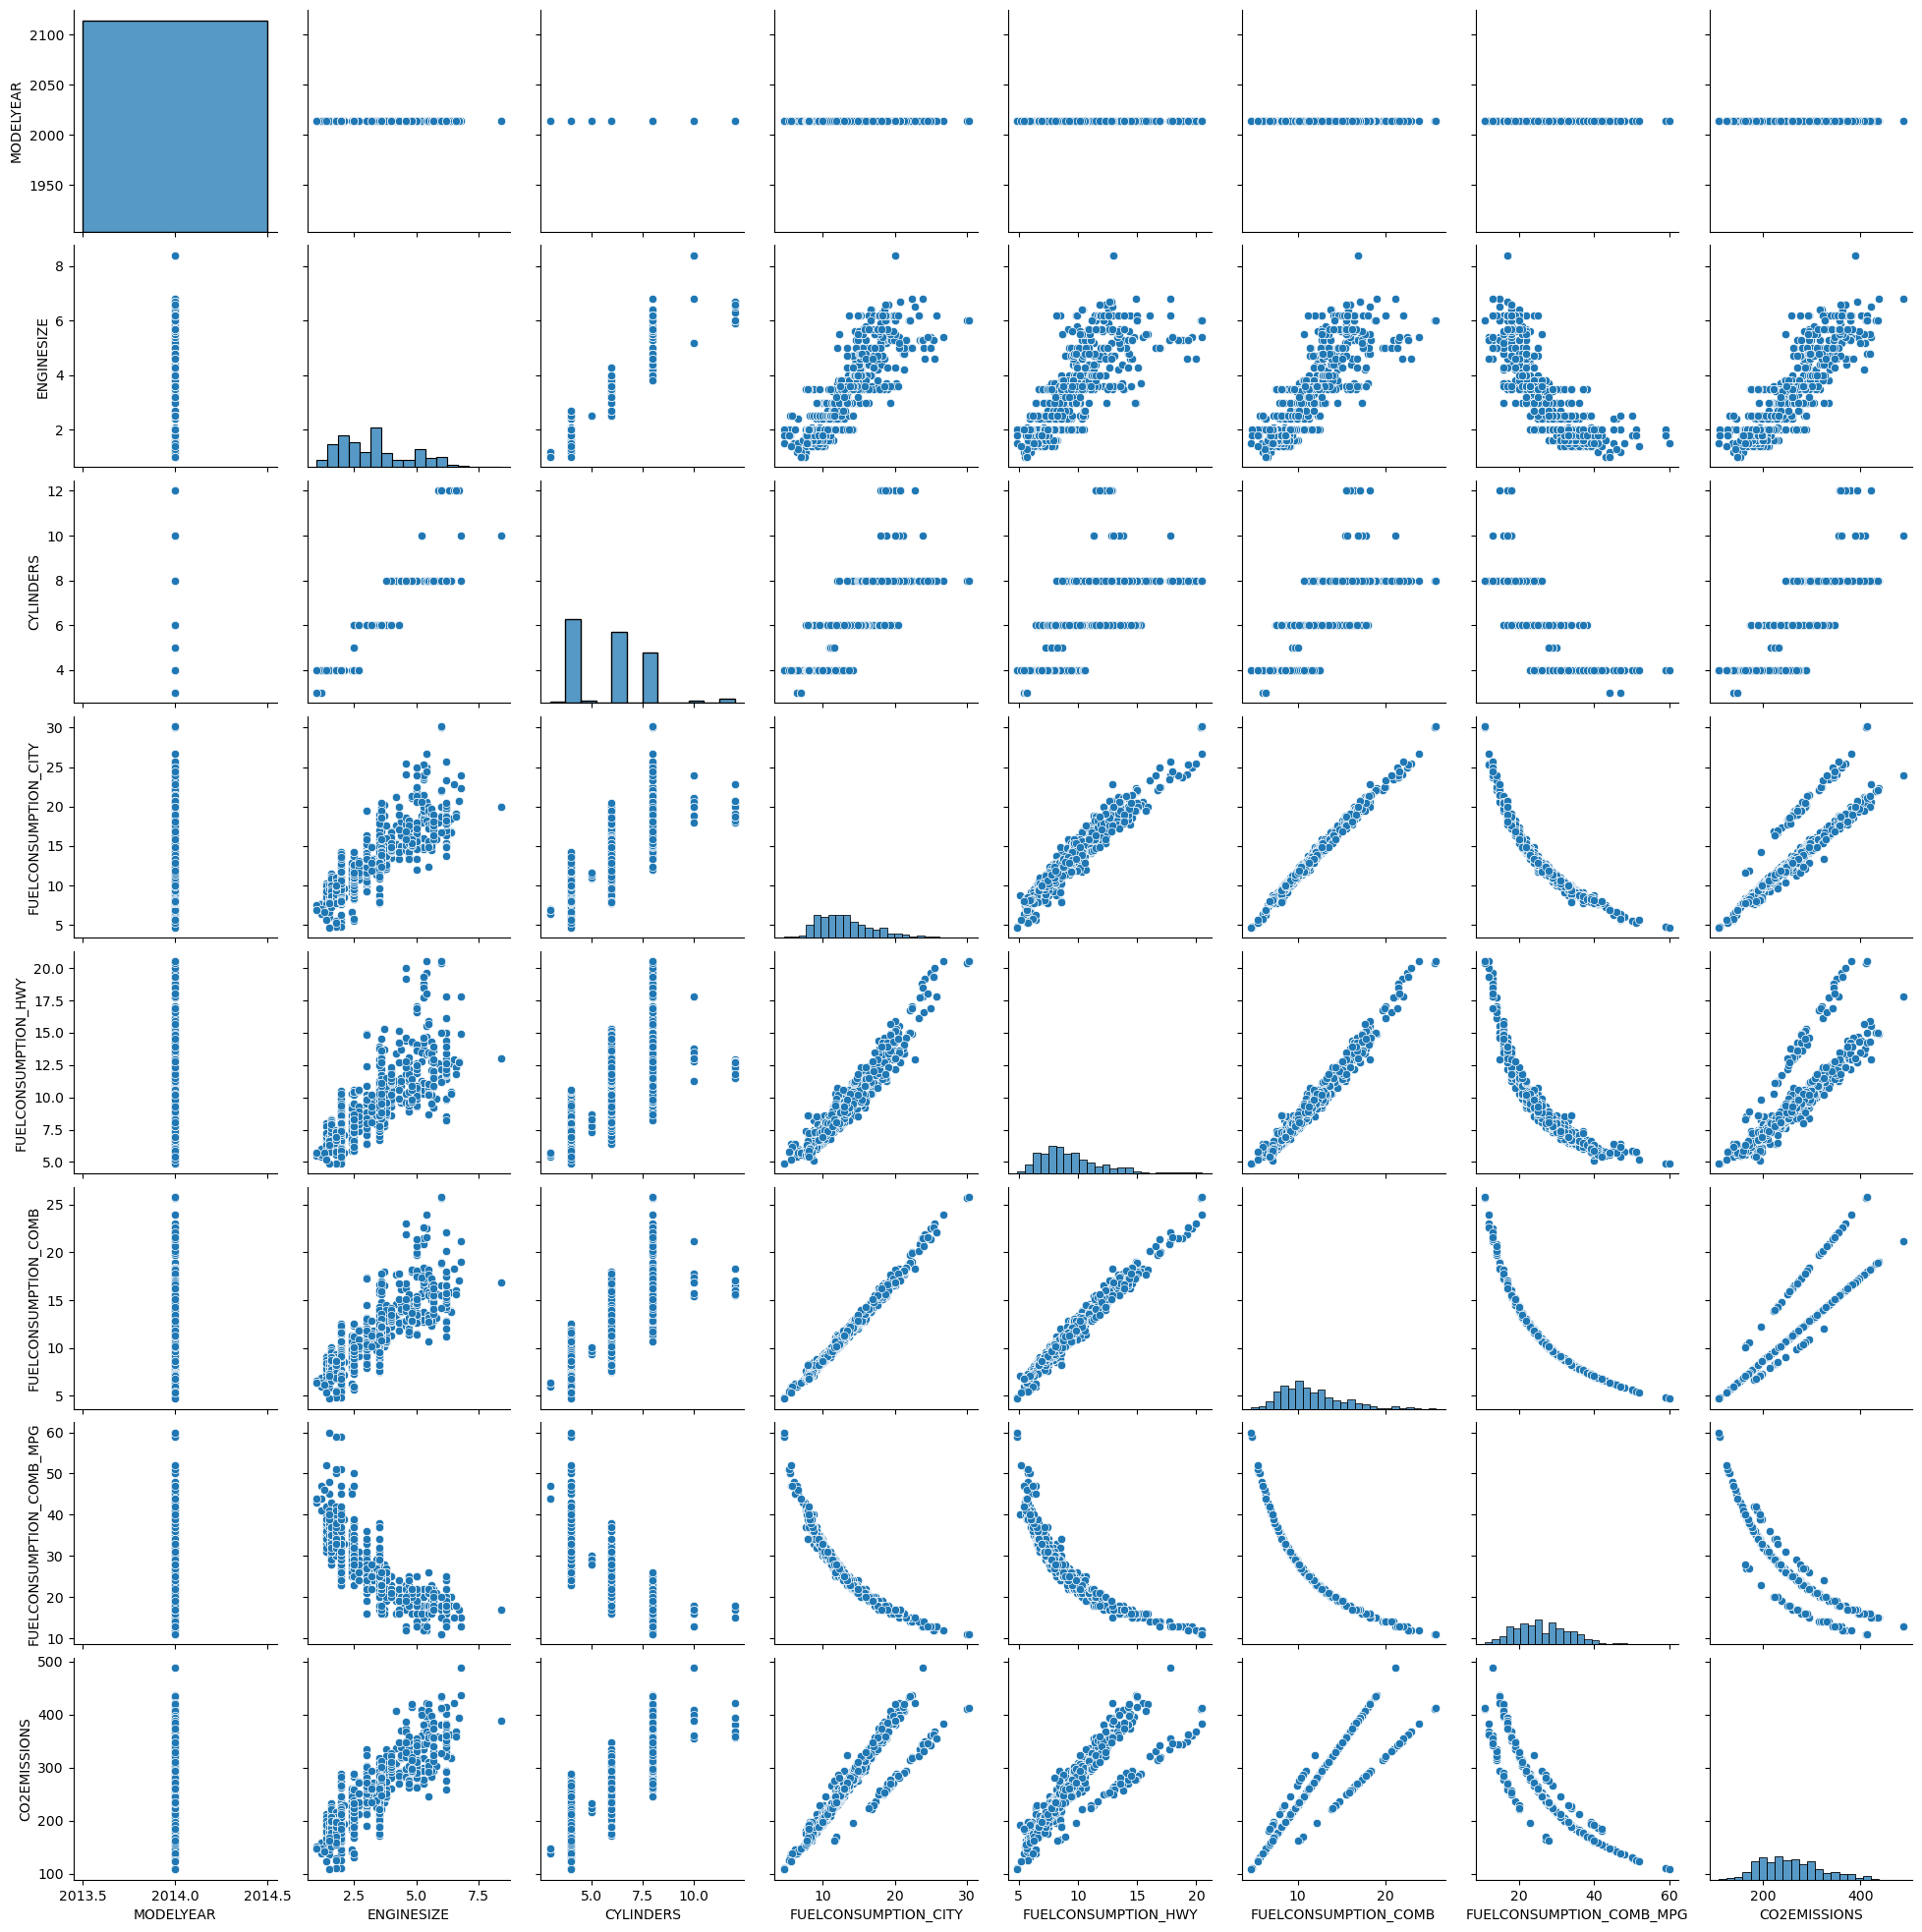

In [9]:
sns.pairplot(df)

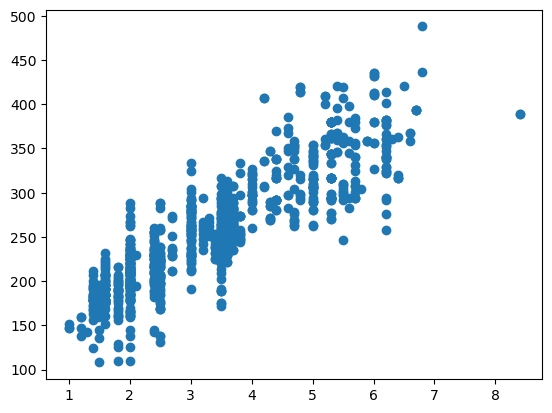

In [10]:
plt.scatter(x = df['ENGINESIZE'], y = df['CO2EMISSIONS'])
plt.show()

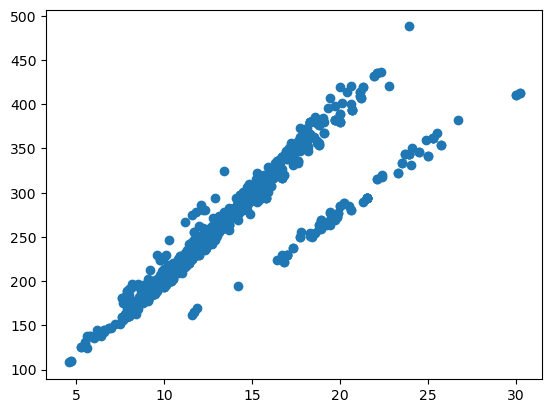

In [16]:
plt.scatter(x = df['FUELCONSUMPTION_CITY'], y=df['CO2EMISSIONS'])
plt.show()

In [22]:
# sns.heatmap(df.corr())

In [20]:
# df['MAKE']

In [23]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [24]:
df1 = df.drop(['MODELYEAR','MAKE','MODEL','VEHICLECLASS','TRANSMISSION','FUELTYPE'], axis= 1)

In [25]:
df1

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...
1062,3.0,6,13.4,9.8,11.8,24,271
1063,3.2,6,13.2,9.5,11.5,25,264
1064,3.0,6,13.4,9.8,11.8,24,271
1065,3.2,6,12.9,9.3,11.3,25,260


In [27]:
df1.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


## 1. Independent and Dependent

In [28]:
df1.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244


In [41]:
x = df1[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']]

In [42]:
y = df1['CO2EMISSIONS']

In [39]:
x.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
0,2.0,4,9.9,6.7,8.5,33
1,2.4,4,11.2,7.7,9.6,29
2,1.5,4,6.0,5.8,5.9,48
3,3.5,6,12.7,9.1,11.1,25
4,3.5,6,12.1,8.7,10.6,27


In [44]:
y.head(10)

0    196
1    221
2    136
3    255
4    244
5    230
6    232
7    255
8    267
9    212
Name: CO2EMISSIONS, dtype: int64

## Model Selection - 1. Training and 2. Testing

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)

In [47]:
x_train.shape

(853, 6)

In [48]:
x_test.shape

(214, 6)

In [49]:
y_train.shape

(853,)

In [50]:
y_test.shape

(214,)

### Apply Multiple Linear Regression

#### y = b0 + b1x1 + b2x2 + ...+bnxn + e [y = mx + c]

In [52]:
lin_model = LinearRegression()

In [53]:
lin_model

LinearRegression()

## Model fitting on Dataset

In [54]:
lin_model.fit(x_train, y_train)

LinearRegression()

### Slope of Straight Line

In [55]:
lin_model.coef_

array([  9.28488433,   7.89929625, -15.40750578,  -7.08126526,
        25.87328816,  -3.82001914])

### Intercept

In [56]:
lin_model.intercept_

252.63519135469198

## Prediction

In [57]:
new_pred = lin_model.predict(x_test)

In [75]:
new_pred[:10]

array([186.31145252, 245.00426896, 267.73769949, 207.65447883,
       171.27993423, 214.99544268, 304.424292  , 242.20864392,
       293.28791887, 387.77917784])

In [60]:
# y[:10] 2.0	4	9.9	6.7	8.5	33

In [72]:
lin_model.predict([[2.4,4,11.2,7.7,9.6,29]])

array([217.02930271])

## Accuracy Score

### Training

In [76]:
lin_model.score(x_train, y_train) * 100

88.35082502662208

### Testing

In [77]:
lin_model.score(x_test, y_test) * 100

91.27094529256922

### Error

In [66]:
df_2 = pd.DataFrame({'Actual_Value': y_test, "New_Prediction": new_pred, 'Error': y_test - new_pred})

In [67]:
df_2

,Actual_Value,New_Prediction,Error
951,179,186.311453,-7.311453
595,255,245.004269,9.995731
291,276,267.737699,8.262301
543,196,207.654479,-11.654479
1032,194,171.279934,22.720066
...,...,...,...
596,294,284.746344,9.253656
227,435,356.518870,78.481130
672,262,301.049382,-39.049382
545,334,324.804645,9.195355


## MSE

![](https://www.gstatic.com/education/formulas2/553212783/en/mean_squared_error.svg)

### Total Error

In [68]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [69]:
mean_squared_error(y_test, new_pred)

324.6719328918697

In [70]:
mean_absolute_error(y_test, new_pred)

11.757119001262406

In [71]:
91.27094529256922 + 11.757119001262406

103.02806429383163